# Windowing

Depending on the part of the body to be studied and taking into account the nature of the tissues in question, it may be useful to apply a contrast enhancement technique known as _windowing_. In this notebook we will show how it works.

You will need a slice from a CT image. Use the notebook **get_slice.ipynb**, located in this same folder, to get the slice you need.

First of all, import the required libraries:

In [8]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

These variables store the path of the slice we are going to work with:

In [9]:
data_folder_path = Path('data')
image_name = 'coronacases_001_image'
slice_number = 122
file_path = Path(f'{image_name}_slice_{slice_number}.npy')
image_slice_path = data_folder_path / file_path

Let's load the image slice:

In [10]:
image_slice = np.load(image_slice_path)
image_slice.shape

(512, 512)

Let's take a look at the slice:

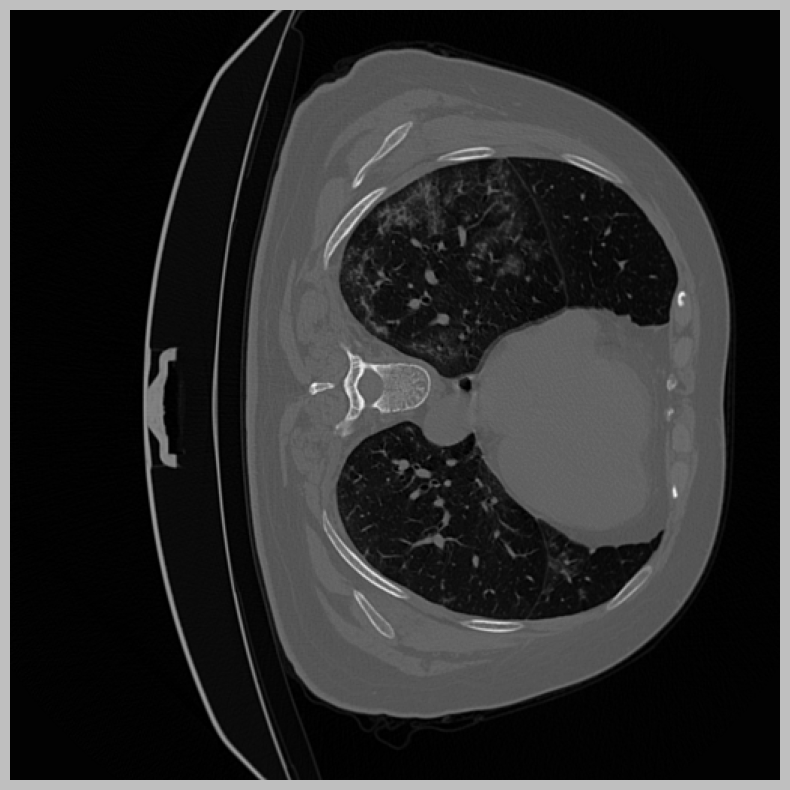

In [11]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.style.use('grayscale')
plt.imshow(image_slice)
plt.show()

If you are interested in knowing why the slice is shown rotated, take a look at the notebook **coordinates_conventions.ipynb**.

The values of the image above are transformed from Hounsfield units (HU) to greyscale by PyPlot. HU represent the attenuation that the X-rays undergo when passing through the material, using distilled water as a reference. These values are in the range $\left[-1000, +1000\right]$.

Windowing is a process that will let us focus in a particular window of the values of the image.

For this, it is necessary to know the width and level of the window to be used.
The window width determines which attenuation values we want to focus our attention on. The window level indicates where the center of the window is located. To apply this window to a certain slice of a CT you can use:

\begin{equation}
  \begin{aligned}
  w_{min} &= l - \frac{w}{2}; w_{max} = l + \frac{w}{2} \\
  \boldsymbol{w} &= \begin{cases}
  w_{min} & \text{if } \boldsymbol{h} \leq w_{min} \\
  w_{max} & \text{if } \boldsymbol{h} \geq w_{max} \\
  \boldsymbol{h}
  \end{cases}
  \end{aligned}
\end{equation}

where $\boldsymbol{h}$ is the value of a given point in \ac{hu}, $\boldsymbol{w}$ is the value of a given point after applying the window, $w$ is the width of the window, and $l$ is the level of the window. The result is that, with a window centered at its level, all values below and above the lead width are ignored. In this case, the window width is 1500, while its level is -650:

In [12]:
window_width = 1500
window_level = -650

Now, let's apply the windowing process to the slice we loaded before:

In [13]:
windowed_image_slice = image_slice[:, :].clip(
    window_level - window_width // 2,
    window_level + window_width // 2)

Let's take a look at the result:

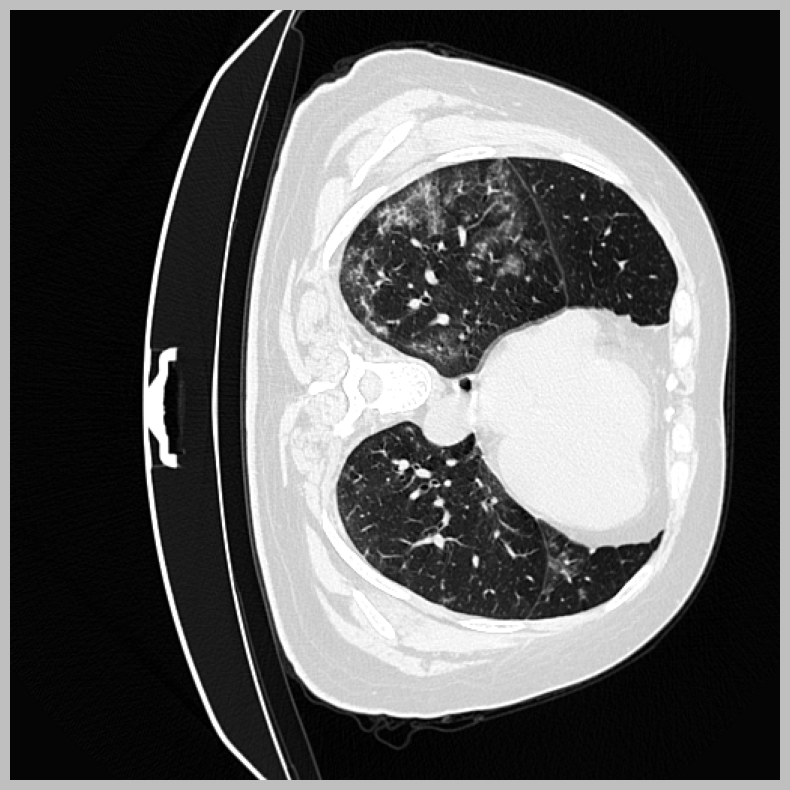

In [14]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.style.use('grayscale')
plt.imshow(windowed_image_slice)
plt.show()

As you can see if you compare both images, the details of the lungs are more defined in the latter.
